The Titanic Problem is based on the sinking of the 'Unsinkable' ship Titanic in the early 1912. It gives information about multiple people like their ages, sexes, sibling counts, embarkment points and whether or not they survived the disaster.<br>
So using this dataset performing a detailed analysis and estimating what kind of people have survived from accident

**Importing the libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [38]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


survived: dependent variable which we have to predict<br>
pclass: typle of class by which passenger was travelling<br>
sibsp: no. of spouses and sibling of passenger who were travelling<br>
parch: no. of parents on the ship<br>
fare : ticket price of the passenger<br>
embarked: board from which passenger boarded the ship C: Cherbourg, S: Southampton, Q:Queenstown<br>
class: pclass<br>
who: male/female<br>
adult_male: true/false<br>
deck: which deck passenger were on the ship(A-G)<br>
embark_town: town from which passenger were boarded <br>
alive: survived or not<br>
alone: mixof sibsp and parch variable (sibsp || parch)<br>

**Initial Analysis of Dataset**

In [39]:
df.info()
# 891 rows and 15 columns
# from here we can make analysis on missing data poinnts
# we can drop deck column as many datapoints are missing
# age has some missing data points we can fill that points using mean or median or using comaprision from other variables
#some variables are repeated or they have same meaning pclass-class,embark-embark_town,survived-alive removing either of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
# dropping repeated variables 
df.drop(['embarked','class','alive'],axis = 1,inplace = True)

In [41]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True
5,0,3,male,NaN,0,0,8.4583,man,True,NaN,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,man,True,E,Southampton,True
7,0,3,male,2.0,3,1,21.0750,child,False,NaN,Southampton,False
8,1,3,female,27.0,0,2,11.1333,woman,False,NaN,Southampton,False
9,1,2,female,14.0,1,0,30.0708,child,False,NaN,Cherbourg,False


**Exploratory Data Analysis(EDA) / Misisng Value Analysis**

In [42]:
# cal the count of all the null values from each column
null_num = [] 
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [43]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [44]:
# visualising in tabular form no. of missing values from dataset
pd.DataFrame(null_num,index = df.columns,columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<AxesSubplot:xlabel='deck', ylabel='count'>

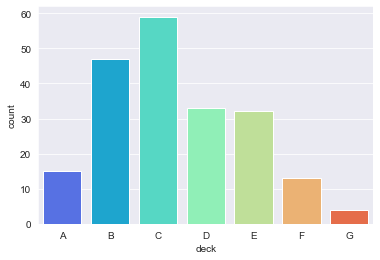

In [45]:
# deck has too many missing value so we will remove it but analysing before removing

# setting the background
sns.set_style('darkgrid')

sns.countplot(x = 'deck',data = df, palette = 'rainbow')
# acc to this chart most of the passengers were on c deck

<AxesSubplot:xlabel='deck', ylabel='count'>

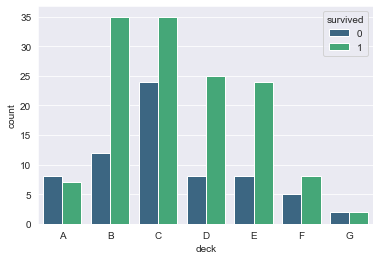

In [46]:
#  visualising how many passengers survived from particular deck
sns.set_style('darkgrid')
sns.countplot(x = 'deck',hue = "survived",data = df, palette = 'viridis')

# B deck was more reliable as more passengers survided from B deck

In [47]:
df.drop(['deck'],axis = 1,inplace = True )

In [48]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<AxesSubplot:xlabel='pclass', ylabel='age'>

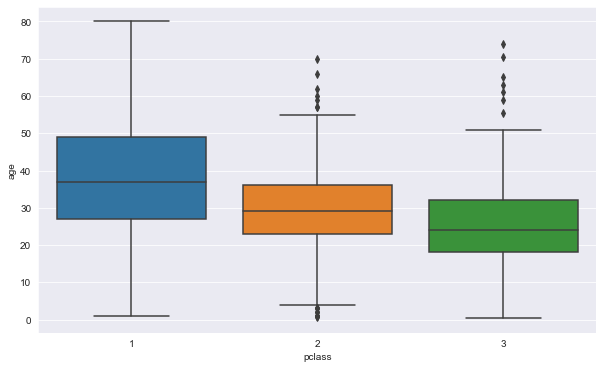

In [49]:
# Dealing with age variable
# age too has many missing values but we cant remove it as it imp for further prediction
# filling na values of age by comapring with its corresponding pclass(ticket class of passenger)
# we will take the avg of age variable acc to ticket classes and then replace it

# visualizing pclass with age using boxplot
plt.figure(figsize = (10,6))
sns.boxplot(x = "pclass", y="age",data = df)

# people with higher age had bought class1 ticket as in fig1
# class1  avg age: 38 ,class2: 29, class3: 23

In [50]:
# creating a function to fill na values according pclass and avg age of pclass
def fillna_age(columns):
#     0 th variable from agrument passed
    age = columns[0]
#     1 st variable from agrument passed
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 23
    else:
#         if age is not null return that age
        return age

In [51]:
df.age = df[['age','pclass']].apply(fillna_age,axis=1)

In [52]:
#  now rechecking missing values in allcolumns
null_num = [] 
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num,index = df.columns,columns = ["Total missing values"])    

# now only 2 missing values in embark_town varibale we can drop them

,Total missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [53]:
# dropping those values
df.dropna(inplace = True)

In [54]:
# again rechecking the missing values from all columns
null_num = [] 
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num,index = df.columns,columns = ["Total missing values"])    

# Now no null values are remaining

,Total missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


# Analysing the variables by visuals

<AxesSubplot:xlabel='survived', ylabel='count'>

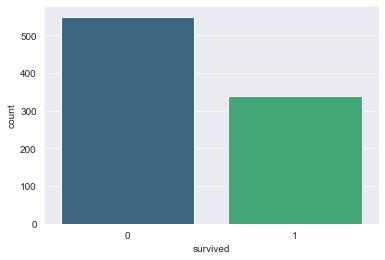

In [55]:
# Analysing the target variable survivial 

#  visualising how many passengers survivved 
sns.set_style('darkgrid')
sns.countplot(x = 'survived',data = df, palette = 'viridis')
# most of the passengers from ship didn't survied

In [56]:
df.survived.value_counts()

0    549
1    340
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

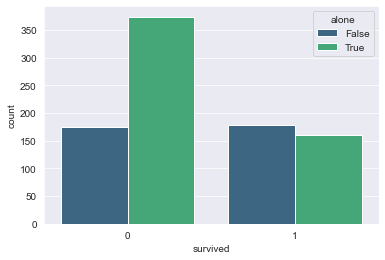

In [57]:
# now analysing are there any factors which affects survivial of passengers

# anlysing impact of being alone on survival of passenger
sns.set_style('darkgrid')
sns.countplot(x = 'survived',hue = 'alone',data = df, palette = 'viridis')

# most of the passengers who were alone, lost their life on the ship

<AxesSubplot:xlabel='survived', ylabel='count'>

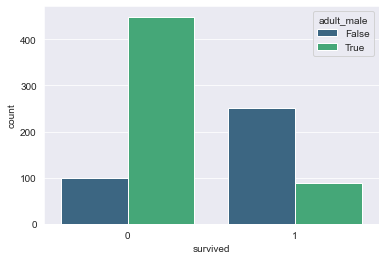

In [58]:
# anlysing impact of being adult_male on survival 
sns.set_style('darkgrid')
sns.countplot(x = 'survived',hue = 'adult_male',data = df, palette = 'viridis')

# most of the adult_male lost their life on the ship, most of the younger passengers survived(children)
# analysing 1 in graph

<AxesSubplot:xlabel='survived', ylabel='count'>

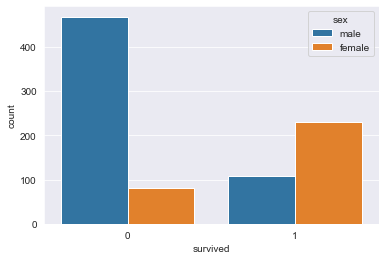

In [59]:
# anlysing impact of being female on survival by analysing sex variable
sns.set_style('darkgrid')
sns.countplot(x = 'survived',hue = 'sex',data = df)

# majority of the passengers who survived were female, most of the male lost their life than female: 0:not survived, 1: survived

<AxesSubplot:xlabel='survived', ylabel='count'>

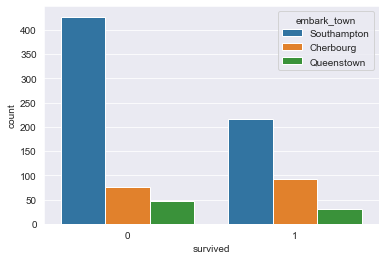

In [60]:
# anlysing impact of boarding town embark_town on survival 
sns.set_style('darkgrid')
sns.countplot(x = 'survived',hue = 'embark_town',data = df)

# most of the people who lost thier life were from Southampton reason may be most people boarded were from Southampton

In [61]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

**Analysing variables with diff plt**

<AxesSubplot:xlabel='age', ylabel='Density'>

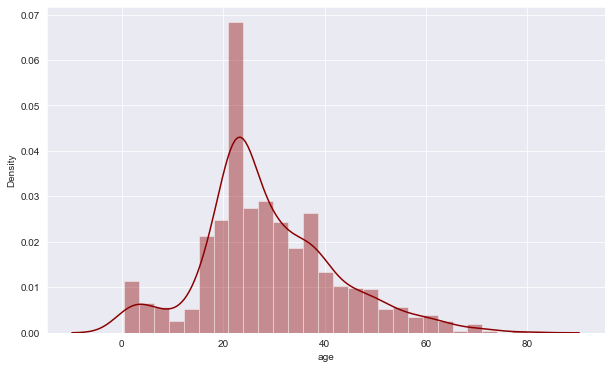

In [62]:
plt.figure(figsize = (10,6))
sns.distplot(df['age'],color = "darkred")

<AxesSubplot:xlabel='fare', ylabel='Density'>

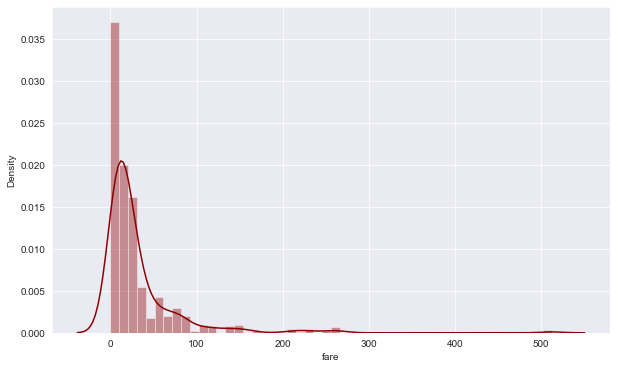

In [63]:
# visulaising the fare price
plt.figure(figsize = (10,6))
sns.distplot(df['fare'],color = "darkred")

<AxesSubplot:>

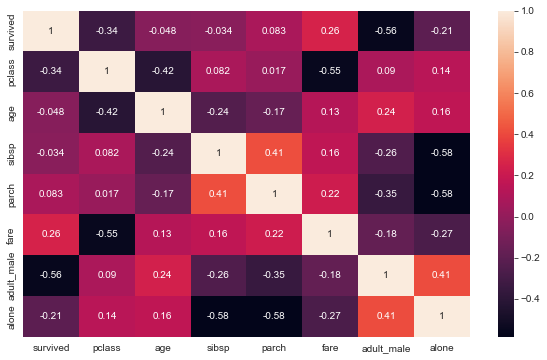

In [64]:
# visualising the relation btw all the variables using heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot =True)

In [65]:
#  in survived section age sibsp and parch has the lowest correlation so we will remove these variables
df.drop(['age','sibsp','parch'],axis=1,inplace = True)
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [66]:
# now we have the dataset in the form which has mostly the impacting variables 
# but we have to convert it in the form in which model will understand i.e numerical form using get_dummies func

sex = pd.get_dummies(df['sex'],drop_first=True)
who = pd.get_dummies(df['who'],drop_first=True)
adult_male = pd.get_dummies(df['adult_male'],drop_first=True)
embark_town = pd.get_dummies(df['embark_town'],drop_first=True)
alone = pd.get_dummies(df['alone'],drop_first=True)


In [67]:
# now concating these dummy variables with dataset

df = pd.concat([df,sex,who,adult_male,embark_town,alone],axis=1)

In [68]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,1,1,0,1,0,1,0
1,1,1,female,71.2833,woman,False,Cherbourg,False,0,0,1,0,0,0,0
2,1,3,female,7.9250,woman,False,Southampton,True,0,0,1,0,0,1,1
3,1,1,female,53.1000,woman,False,Southampton,False,0,0,1,0,0,1,0
4,0,3,male,8.0500,man,True,Southampton,True,1,1,0,1,0,1,1


In [69]:
df.drop(['sex','who','adult_male','embark_town','alone'],axis=1,inplace=True)
df.head()

,survived,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,1,1,0,1,0,1,0
1,1,1,71.2833,0,0,1,0,0,0,0
2,1,3,7.9250,0,0,1,0,0,1,1
3,1,1,53.1000,0,0,1,0,0,1,0
4,0,3,8.0500,1,1,0,1,0,1,1


In [70]:
#  Now the datset is ready therefore applying logistic Regression 

**Modelling**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# seperating the dep and the indep variables
X = df.drop('survived',axis=1)
y = df['survived']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =42)

In [74]:
# creating our logistic regression model
from sklearn.linear_model import LogisticRegression

In [75]:
reg = LogisticRegression()

In [76]:
reg.fit(X_train,y_train)

LogisticRegression()

In [77]:
# predicticting the test data
y_pred = reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [78]:
#  now we can test the accuracy of our algorithm using classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [80]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

# type 1 error : 22
# type 2 error: 13

array([[111,  30],
       [ 17,  65]], dtype=int64)